In [57]:
import pandas as pd
import matplotlib as mp
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import geopandas as gpd

In [35]:
df = pd.read_csv(r"C:\Users\arthu\Desktop\ocorrencia.csv", delimiter=';')

df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,N O,NaN,0,1,N O
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERL NDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,N O,NaN,0,1,N O
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,N O,NaN,0,1,N O
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,N O,NaN,0,1,N O
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,S O JOS DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,N O,NaN,0,1,N O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13180,28377,28377,28377,28377,28377,ACIDENTE,***,***,IMPERATRIZ,MA,...,27/01/2007,11:18:00,SIM,FINALIZADA,A-053/CENIPA/2009,SIM,2009-11-16,2,1,N O
13181,28375,28375,28375,28375,28375,ACIDENTE,-23.6122222222,-51.385,APUCARANA,PR,...,26/01/2007,18:15:00,SIM,FINALIZADA,A-021/CENIPA/2010,SIM,2007-08-15,1,1,N O
13182,28355,28355,28355,28355,28355,ACIDENTE,-17.2541666667,-43.8536111111,BOCAI VA,MG,...,18/01/2007,09:10:00,SIM,FINALIZADA,A-001/CENIPA/2010,SIM,2010-03-19,11,1,N O
13183,28335,28335,28335,28335,28335,ACIDENTE,-23.3444444444,-51.0633333333,LONDRINA,PR,...,19/01/2007,12:30:00,SIM,FINALIZADA,A-169/CENIPA/2013,SIM,2013-12-16,1,1,N O


In [36]:
conn = sqlite3.connect('banco.db')

In [38]:
df.to_sql('ocorrencias_aereas', conn, if_exists='replace', index=False)

13185

In [ ]:
df = pd.read_sql_query("SELECT * FROM ocorrencias_aereas", conn)


       codigo_ocorrencia  codigo_ocorrencia1  codigo_ocorrencia2  \
0                  87125               87125               87125   
1                  87124               87124               87124   
2                  87123               87123               87123   
3                  87122               87122               87122   
4                  87121               87121               87121   
...                  ...                 ...                 ...   
13180              28377               28377               28377   
13181              28375               28375               28375   
13182              28355               28355               28355   
13183              28335               28335               28335   
13184              28256               28256               28256   

       codigo_ocorrencia3  codigo_ocorrencia4 ocorrencia_classificacao  \
0                   87125               87125                INCIDENTE   
1                   87124          

In [126]:
df = pd.read_csv(r"C:\Users\arthu\Desktop\ocorrencia.csv", delimiter=';')
df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'], format='%H:%M:%S')
df['hora_arredondada'] = df['ocorrencia_hora'].dt.round('30min')

ocorrencias = df

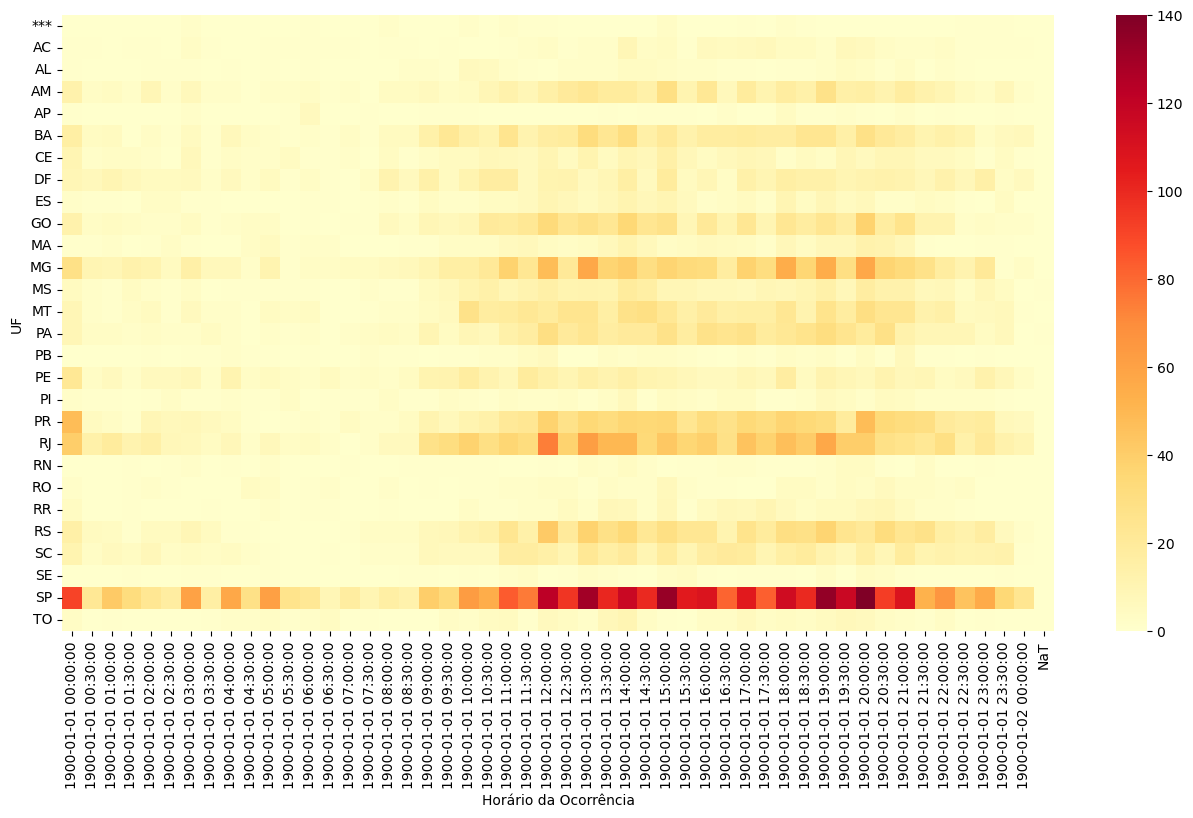

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o DataFrame
ocorrencias['ocorrencia_hora'] = ocorrencias['hora_arredondada'].astype(str)


tabela = pd.crosstab(ocorrencias['ocorrencia_uf'], ocorrencias['ocorrencia_hora'])


plt.figure(figsize=(16, 8))
sns.heatmap(tabela, cmap='YlOrRd')
plt.xlabel('Horário da Ocorrência')
plt.ylabel('UF')
plt.xticks(rotation=90)  # Rotaciona os horários para melhor visualização
plt.show()


In [72]:
print(df.columns)
print(df.index)

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista'],
      dtype='object')
RangeIndex(start=0, stop=13185, step=1)
